# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
body_fat = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/560_bodyfat/560_bodyfat.tsv.gz", sep='\t')
body_fat.sample(10)

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
246,1.0308,69.0,215.50,70.50,40.799999,113.699997,107.599998,110.000000,63.299999,44.000000,22.600000,37.500000,32.599998,18.799999,30.200001
151,1.0542,26.0,241.75,74.50,41.799999,108.300003,102.900002,114.400002,72.900002,43.500000,25.100000,38.500000,33.799999,19.600000,19.600000
13,1.0505,30.0,205.25,71.25,39.400002,104.099998,101.800003,108.599998,66.000000,41.500000,23.700001,36.900002,31.600000,18.799999,21.200001
127,1.0590,43.0,152.25,67.75,37.500000,95.900002,78.000000,93.199997,53.500000,35.799999,20.799999,33.900002,28.200001,17.400000,17.400000
228,1.0647,56.0,174.50,69.50,38.099998,104.000000,89.400002,98.400002,58.400002,37.400002,22.500000,34.599998,30.100000,18.799999,14.900000
111,1.0355,43.0,183.25,70.00,37.099998,108.000000,105.000000,103.000000,63.700001,40.000000,23.600000,33.500000,27.799999,17.400000,28.000000
137,1.0325,43.0,187.75,74.00,37.700001,97.800003,98.599998,100.599998,63.599998,39.200001,23.799999,34.299999,28.400000,17.700001,29.400000
162,1.0690,33.0,184.25,68.75,40.700001,98.900002,92.099998,103.500000,64.000000,37.299999,23.500000,33.500000,30.600000,19.700001,13.000000
189,1.0434,41.0,185.00,68.25,38.000000,103.400002,101.199997,103.099998,61.500000,40.400002,22.900000,33.400002,29.200001,18.500000,24.400000
197,1.0583,42.0,168.00,71.50,36.500000,92.000000,89.699997,101.000000,62.299999,38.000000,22.299999,30.799999,27.799999,16.900000,17.700001


I opened the raw body fat dataset and then sampled a random set of 10 rows.

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [4]:
body_fat.columns

Index(['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip',
       'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'target'],
      dtype='object')

In [5]:
body_fat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   Age      252 non-null    float64
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
 14  target   252 non-null    float64
dtypes: float64(15)
memory usage: 29.7 KB


## Features
##### Data type: float64

`Density`: Person's body density, measured from underwater weighing ($gm/cm^3$)

`Age`: Person's age ($years$)

`Weight`: Person's weight ($lbs$)

`Height`: Person's height ($in$)

`Neck`: Person's neck circumference ($cm$)

`Chest`: Person's chest circumference ($cm$)

`Abdomen`: Person's abdomen circumference ($cm$)

`Hip`: Person's hip circumference ($cm$)

`Thigh`: Person's thigh circumference ($cm$)

`Knee`: Person's knee circumference ($cm$)

`Ankle`: Person's ankle circumference ($cm$)

`Biceps`: Person's biceps circumference ($cm$)

`Forearm`: Person's forearm circumference ($cm$)

`Wrist`: Person's wrist circumference ($cm$)

## Target
##### Data type: float64

`target`: Person's body fat percentage

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

In [6]:
# Get data type of each column and non-null counts
body_fat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   Age      252 non-null    float64
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
 14  target   252 non-null    float64
dtypes: float64(15)
memory usage: 29.7 KB


In [7]:
# Check if there are any missing values in the dataset
body_fat.count()

Density    252
Age        252
Weight     252
Height     252
Neck       252
Chest      252
Abdomen    252
Hip        252
Thigh      252
Knee       252
Ankle      252
Biceps     252
Forearm    252
Wrist      252
target     252
dtype: int64

In [8]:
# Check if there are any missing values in each column
body_fat.isna().sum()

Density    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
target     0
dtype: int64

In [9]:
# Get basic statistics on each of the columns in the dataset
body_fat.describe()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,44.884921,178.924405,70.148810,37.992064,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,19.150794
std,0.019031,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411804,1.694894,3.021274,2.020691,0.933585,8.368740
min,0.995000,22.000000,118.500000,29.500000,31.100000,79.300003,69.400002,85.000000,47.200001,33.000000,19.100000,24.799999,21.000000,15.800000,0.000000
25%,1.041400,35.750000,159.000000,68.250000,36.400002,94.350000,84.574999,95.500000,56.000000,36.975000,22.000000,30.200001,27.299999,17.600000,12.475000
50%,1.054900,43.000000,176.500000,70.000000,38.000000,99.649998,90.950001,99.300003,59.000000,38.500000,22.799999,32.049999,28.700001,18.299999,19.200001
75%,1.070400,54.000000,197.000000,72.250000,39.425001,105.375002,99.324997,103.525000,62.349999,39.925001,24.000000,34.325000,30.000000,18.799999,25.299999
max,1.108900,81.000000,363.149994,77.750000,51.200001,136.199997,148.100006,147.699997,87.300003,49.099998,33.900002,45.000000,34.900002,21.400000,47.500000


In [10]:
# Get the correlations between the columns
body_fat.corr()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
Density,1.000000,-0.277637,-0.594062,0.097881,-0.472967,-0.682599,-0.798955,-0.609332,-0.553091,-0.495041,-0.264890,-0.487109,-0.351648,-0.325716,-0.987782
Age,-0.277637,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531,0.291458
Weight,-0.594062,-0.012746,1.000000,0.308279,0.830716,0.894190,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775,0.612414
Height,0.097881,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065,-0.089495
Neck,-0.472967,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826,0.490592
Chest,-0.682599,0.176450,0.894190,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162,0.702620
Abdomen,-0.798955,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832,0.813432
Hip,-0.609332,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090,0.625201
Thigh,-0.553091,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685,0.559608
Knee,-0.495041,0.017516,0.853167,0.286053,0.672405,0.719496,0.737179,0.823473,0.799170,1.000000,0.611608,0.678709,0.555898,0.664507,0.508665


- `Density` seems to be very negatively correlated to the target (-0.987782). There are also strong negative correlations with `Abdomen` (-0.798955), `Chest` (-0.682599), `Hip` (-0.609332), `Weight` (-0.594062), and `Thigh` (-0.553091).

- `Age` does not have strong correlations between the columns. The most significant correlations are with `Density` (-0.277637) and the `target` (0.291458), but even then they are not very correlated negatively or positively.

- `Weight` has significant and high correlations with most columns with the exception of `Age` (-0.012746) and `Height` (0.308279).

- `Height` has low correlations with most columns. The most significant correlations to potentially explore are with `Wrist` (0.322065), `Weight` (0.308279), and `Knee` (0.286053).

- `Neck` interestingly has a very high positive correlation with `Weight` (0.830716), `Chest` (0.784835), `Abdomen` (0.754077), `Hip` (0.734958), `Biceps` (0.731146), and `Wrist` (0.744826).

- `Chest` has a very high positive correlation with `Abdomen` (0.915828) which makes sense because the chest and abdomen make up most of the torso, which for many people is also where they carry the most weight on their body (`Weight` has a high positive correlation of 0.894190). Interestingly, however, body `Density` has a significant negative correlation (-0.682599).

- `Abdomen` is highly positively correlated with `Chest` (0.915828), `Hip` (0.874066), `Thigh` (0.766624), and `Neck` (0.754077). There is a strong negative correlation with body `Density` (-0.798955).

- `Hip` has somewhat strong to very strong correlations with most columns, with the exceptions of `Height` (0.170394) and `Age` (-0.050332). The most significant correlations with `Hip` are `Weight` (0.940884), `Thigh` (0.896410), `Abdomen` (0.874066), `Chest` (0.829420), and `Knee` (0.823473).

- `Thigh` has high positive correlations with `Hip` (0.896410), `Weight` (0.868694), and `Knee` (0.799170). The least correlated feature is `Height` (0.148436).

- `Knee` has strong postive correlations with `Weight` (0.853167), `Hip` (0.823473), `Thigh` (0.799170).

- `Ankle` has some correlation with most columns, with the exception of `Age` (-0.105058), `Density` (-0.264890), and `Height` (0.264744). This makes sense because the ankle is usually very small for people in relation to the other body part measurement features, so it would be expected that the correlations aren't very strong.

- `Biceps` has strong correlations with `Weight` (0.800416), `Thigh` (0.761477), and `Hip` (0.739273). The least correlated features are `Age` (-0.041162) and `Height` (0.207816).

- `Forearm` is mostly low to medium level correlations with the other features. The most significant correlations are `Biceps` (0.678255), `Weight` (0.630301), and `Neck` (0.623660). `Biceps` makes sense that it would be a stronger correlation than the others since the forearm and biceps compared to other body parts are more proportional to one another. It is interesting that the forearm has a relatively strong correlation with the `Neck`.

- `Wrist` interestingly has a strong positive correlation with the `Neck` (0.744826). `Weight` (0.729775) and `Chest` (0.660162) are also significantly correlated.

### Most significant correlations with the target (body fat percentage)

- `target` has a near-perfectly negative correlation with body `Density` (-0.987782).
- `target` has a very strong positive correlation with the `Abdomen` (0.813432).
- `target` has a strong positive correlation with the `Chest` (0.702620).
- `target` has a somewhat strong positive correlation with the `Hip` (0.625201).
- `target` has a somewhat strong positive correlation with `Weight` (0.612414).

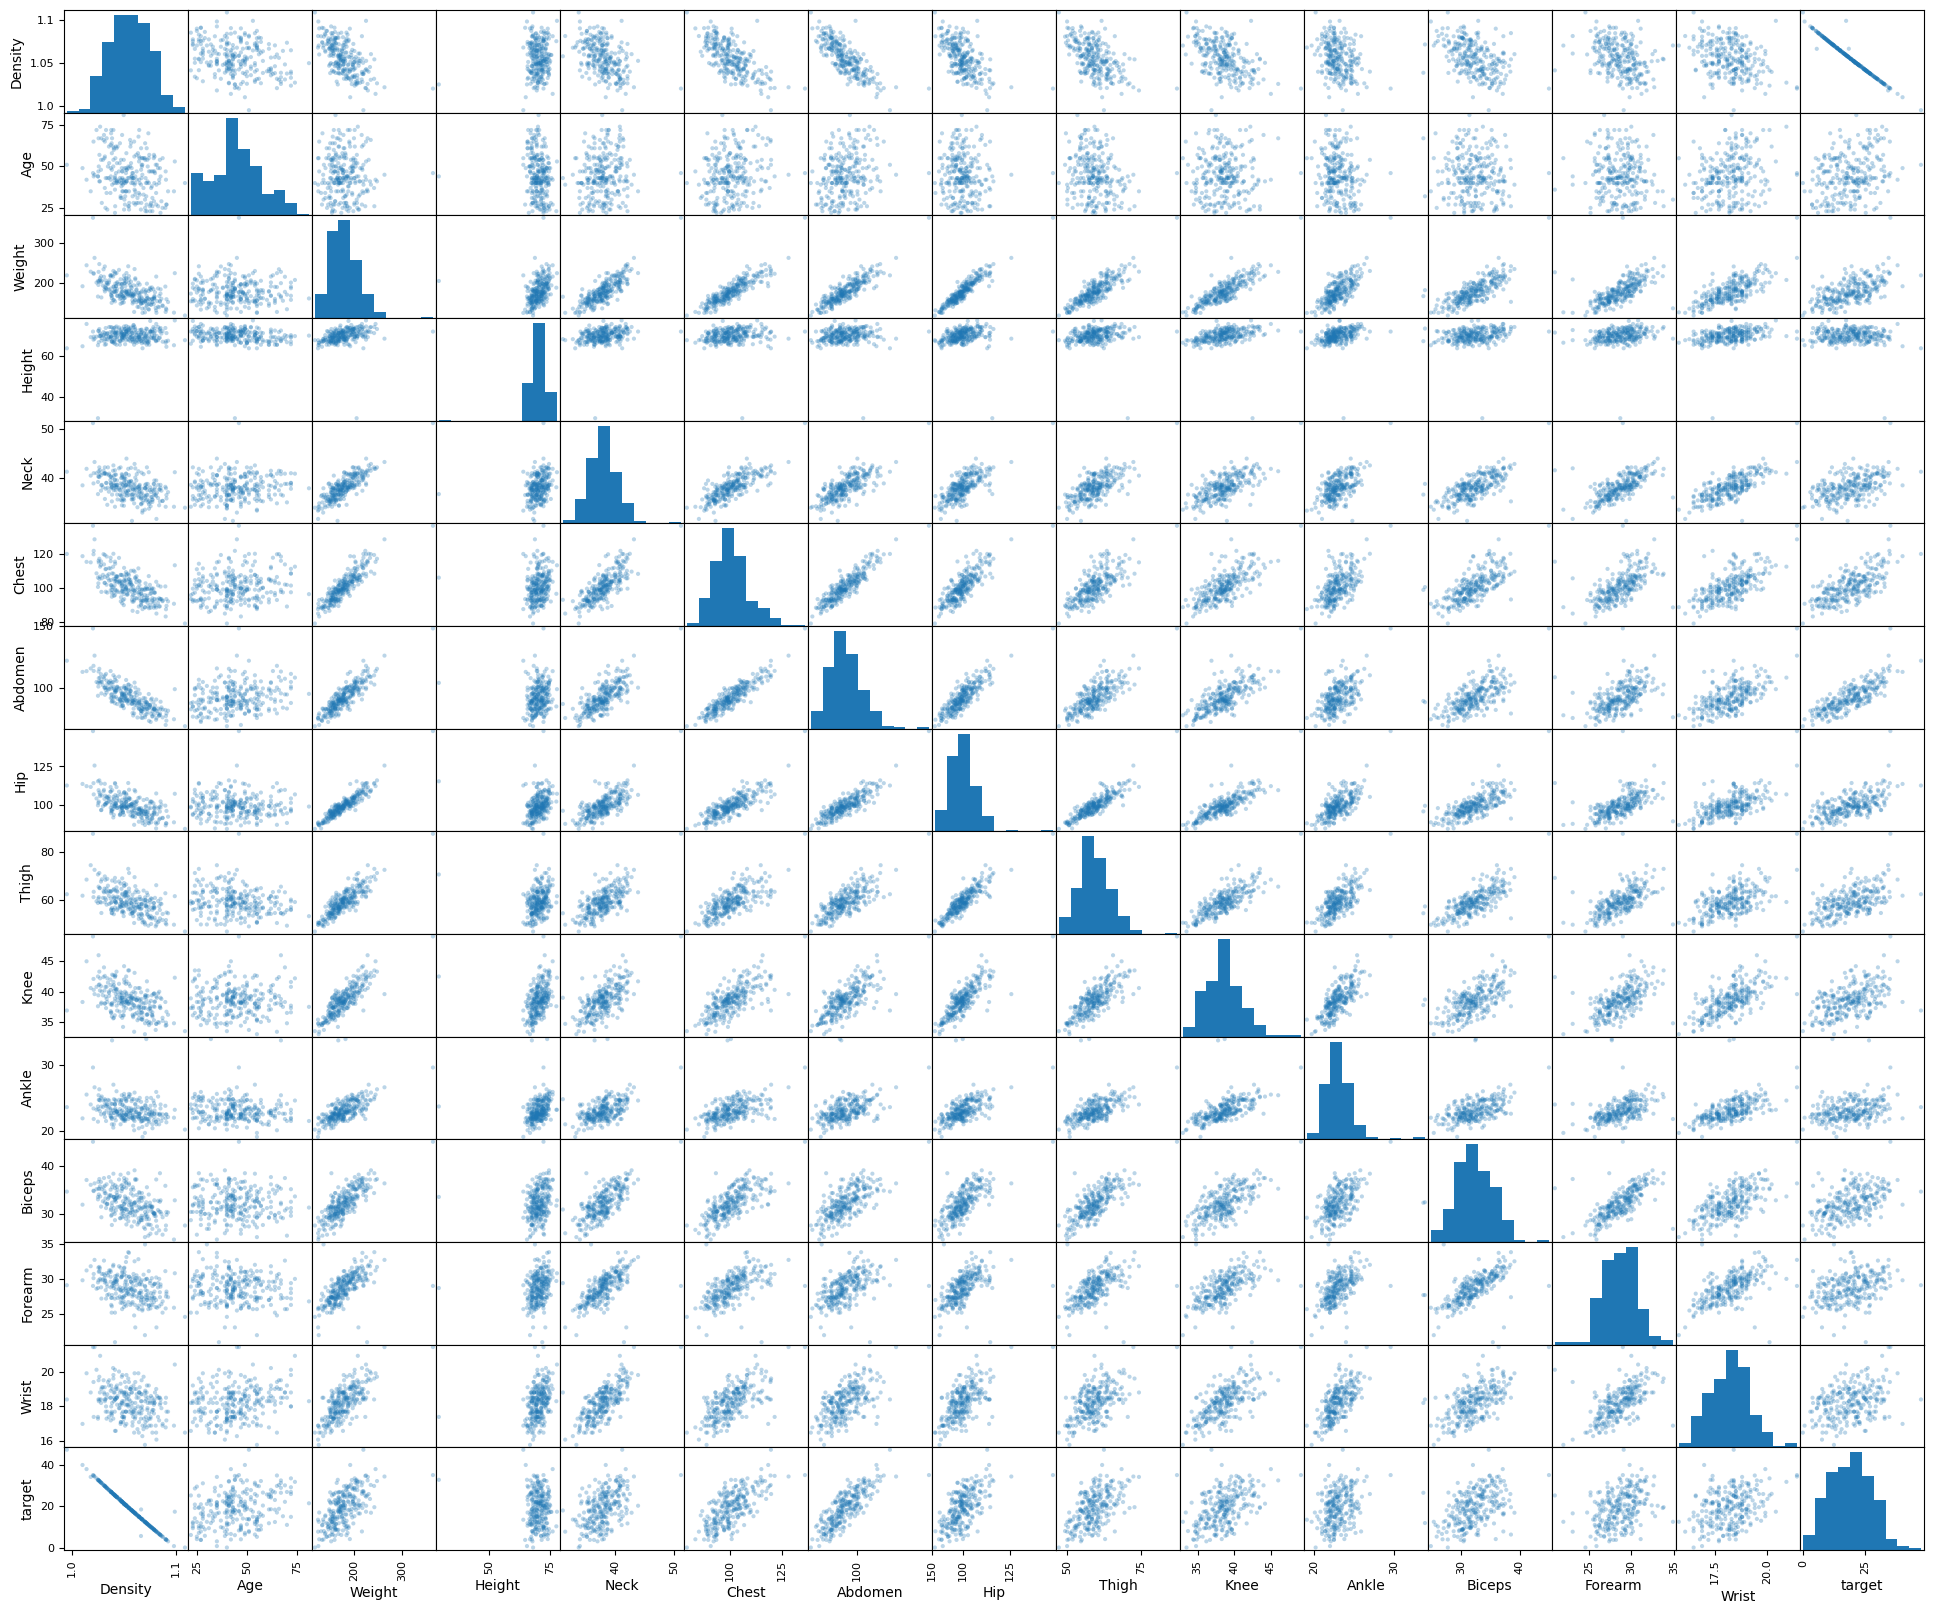

In [11]:
# Plot a scatter matrix of all the columns to analyze the relationships
_ = pd.plotting.scatter_matrix(body_fat, figsize=(24,20), alpha=0.3)

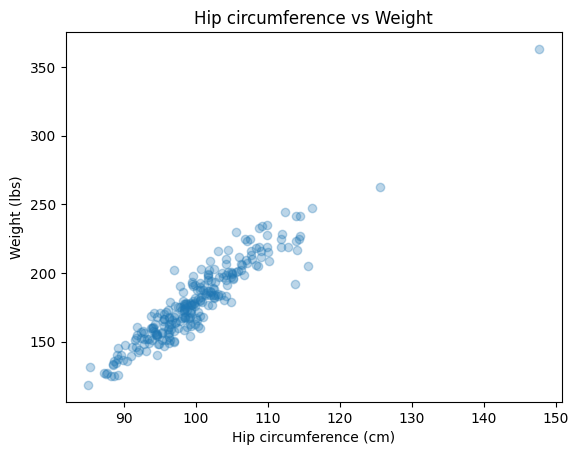

In [12]:
plt.scatter(body_fat['Hip'], body_fat['Weight'], alpha=0.3)
plt.xlabel("Hip circumference (cm)")
plt.ylabel("Weight (lbs)")
plt.title("Hip circumference vs Weight")
None

`Hip` circumference and `Weight` seem to have a strong positive correlation. As hip circumference increases, weight typically increases as well. I chose this specific chart because in the third column of the scatter matrix above showed several strong positive correlation relationships but this one seemed to be the most positively correlated out of them all because the samples are more condensed in a diagonal line while the others are more spread out with less of a defined diagonal thin line. Additionally, the strong positive correlation between hip circumference and weight makes sense logically because that is a popular part of the human body that holds more body fat, thus the circumference increasing and adding more weight to the person.

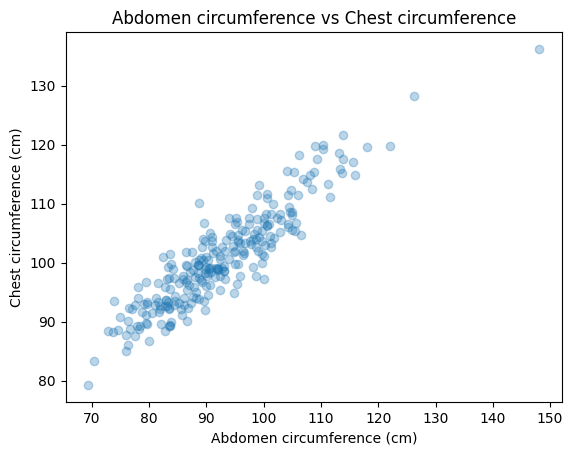

In [13]:
plt.scatter(body_fat['Abdomen'], body_fat['Chest'], alpha=0.3)
plt.xlabel("Abdomen circumference (cm)")
plt.ylabel("Chest circumference (cm)")
plt.title("Abdomen circumference vs Chest circumference")
None

`Abdomen` circumference and `Chest` circumference look like they have a very strong positive correlation with one another. This makes sense because the abdomen and chest make up the torso of the human body and are typically similar in size. As the `Abdomen` circumference increases, more than likely the `Chest` circumference increased as well. I chose this chart because when I looked at the scatter matrix, the subcharts that usually catch my eye first are the strong positive or negative correlations rather than spread out data with no clear relationships.

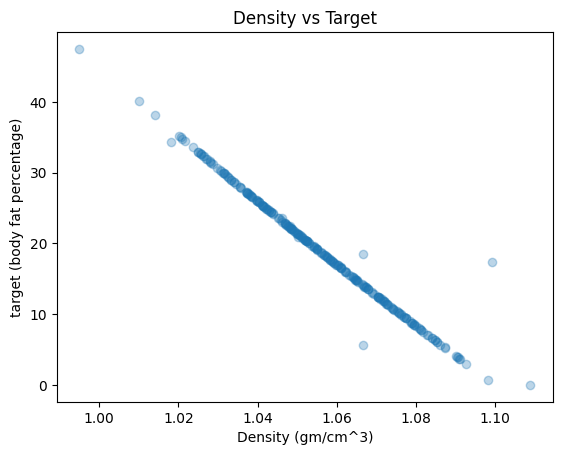

In [14]:
plt.scatter(body_fat['Density'], body_fat['target'], alpha=0.3)
plt.xlabel("Density (gm/cm^3)")
plt.ylabel("target (body fat percentage)")
plt.title("Density vs Target")
None

I chose this chart because it easy stands out from the rest of the subcharts in the scatter matrix above. It is very interesting to see that the `target` (body fat percentage) is almost perfectly negatively correlated with `Density`. From this chart, as someone's body density increases, their body fat percentage decreases. This means that the less fat someone has, the more dense their body density is. I also chose this chart because this is a very important feature for building potential models since the correlation with the target is so strong.

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

In [15]:
# Get all correlations
body_fat.corr()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
Density,1.000000,-0.277637,-0.594062,0.097881,-0.472967,-0.682599,-0.798955,-0.609332,-0.553091,-0.495041,-0.264890,-0.487109,-0.351648,-0.325716,-0.987782
Age,-0.277637,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531,0.291458
Weight,-0.594062,-0.012746,1.000000,0.308279,0.830716,0.894190,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775,0.612414
Height,0.097881,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065,-0.089495
Neck,-0.472967,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826,0.490592
Chest,-0.682599,0.176450,0.894190,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162,0.702620
Abdomen,-0.798955,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832,0.813432
Hip,-0.609332,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090,0.625201
Thigh,-0.553091,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685,0.559608
Knee,-0.495041,0.017516,0.853167,0.286053,0.672405,0.719496,0.737179,0.823473,0.799170,1.000000,0.611608,0.678709,0.555898,0.664507,0.508665


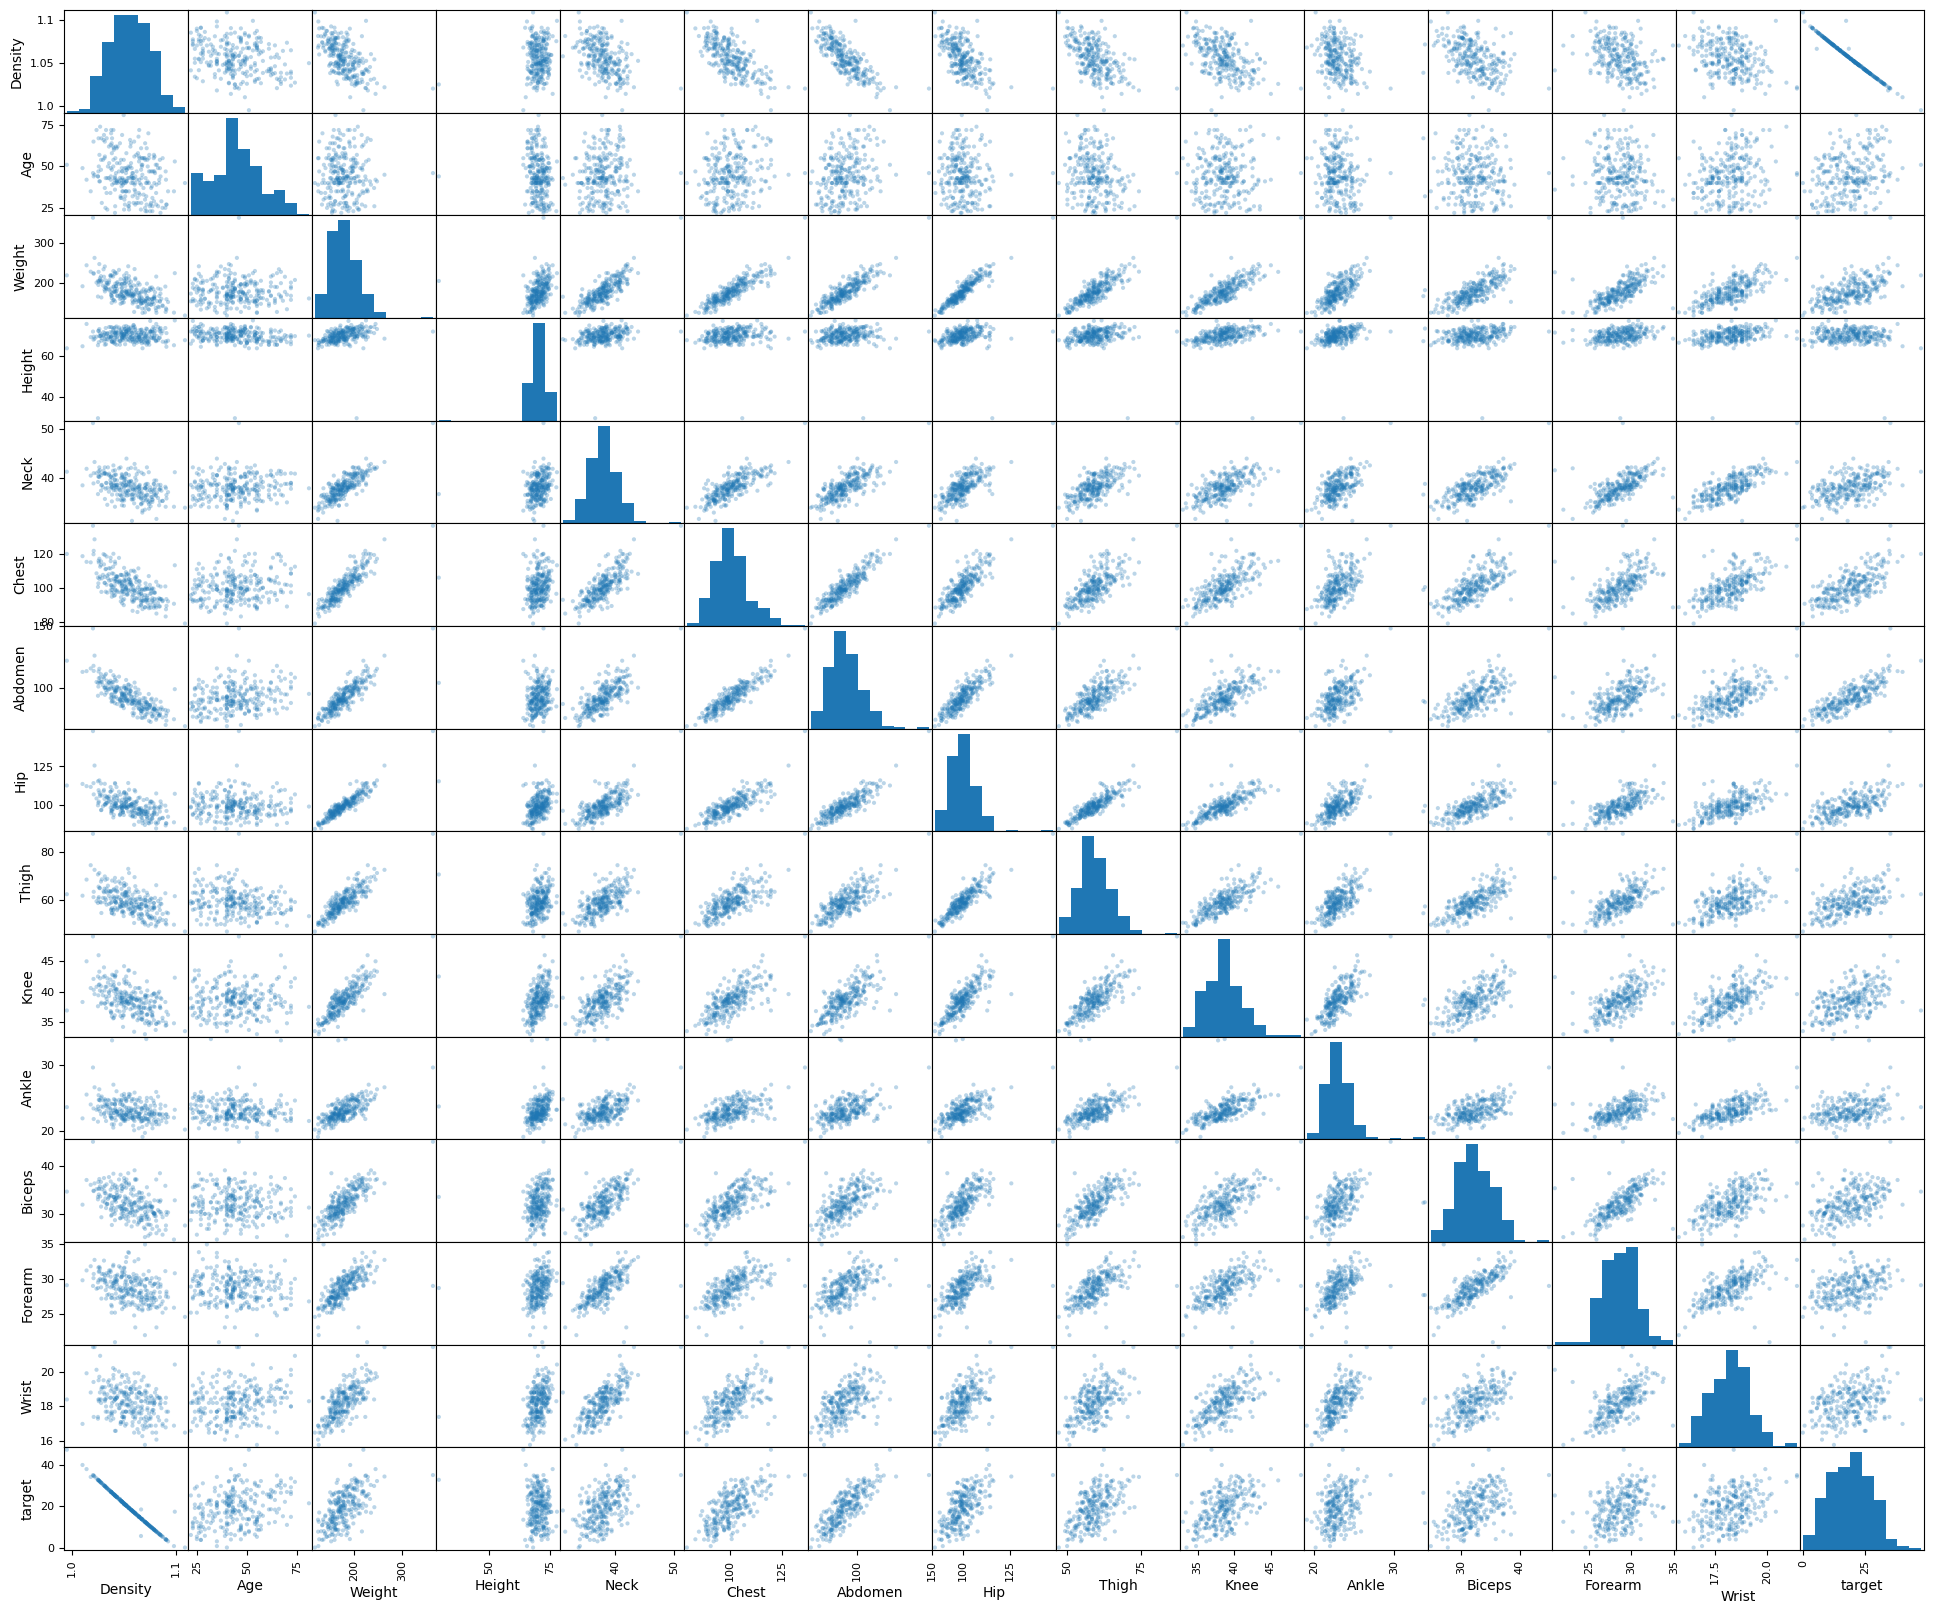

In [16]:
# Plot a scatter matrix of all the columns to analyze the correlations between pairs of columns
_ = pd.plotting.scatter_matrix(body_fat, figsize=(24,20), alpha=0.3)

Used the scatter matrix to look for strong postive or negative correlation relationships (tight diagonal lines)

### Extra: Correlation Pair DataFrame to check for strongest correlations (Used as a double check after looking at the scatter matrix subcharts)

In [17]:
# Get correlation values for each column pair
corr = body_fat.corr()

# fill diagonal with 0 in order to find next highest correlation (gets rid of the 1.0 correlation pair of the column vs the same column)
np.fill_diagonal(corr.values, 0) 

# Absolute value correlations in order to find strongest negative correlations too
abs_corr = corr.abs()

# Find strongest correlation pair for each column
highest_corr_pairs = abs_corr.idxmax()
highest_corr_values = abs_corr.max()

values = []
for c in highest_corr_pairs.index:
    second_col = highest_corr_pairs[c]
    val = corr.loc[c, second_col] # search for value based on original correlation data frame not the abs_corr to get strong negative numbers
    values.append(val)

# Strongest correlation pair for each column (positive or negative)
pd.DataFrame({'Highest Correlation Column Pair': highest_corr_pairs, 'Strongest Correlation Value': values, 'Highest Absolute Value Correlation': highest_corr_values}).sort_values(by='Strongest Correlation Value', ascending=False)

,Highest Correlation Column Pair,Strongest Correlation Value,Highest Absolute Value Correlation
Weight,Hip,0.940884,0.940884
Hip,Weight,0.940884,0.940884
Chest,Abdomen,0.915828,0.915828
Abdomen,Chest,0.915828,0.915828
Thigh,Hip,0.896410,0.896410
Knee,Weight,0.853167,0.853167
Neck,Weight,0.830716,0.830716
Biceps,Weight,0.800416,0.800416
Wrist,Neck,0.744826,0.744826
Forearm,Biceps,0.678255,0.678255


## Most correlated columns
- `target` and `Density` (near-perfect negative correlation)
- `Hip` and `Weight` (strong positive correlation)
- `Chest` and `Abdomen` (strong positive correlation)
- `Thigh` and `Hip` (strong positive correlation)
- `Knee` and `Weight` (strong positive correlation)
- `Thigh` and `Weight` (strong positive correlation)
- `Neck` and `Weight` (strong positive correlation)
- `Biceps` and `Weight` (strong positive correlation)
- `Hip` and `Abdomen` (strong positive correlation)

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

[Random Forest Regressor - Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
- [How the model works](https://builtin.com/data-science/random-forest-python)

[Elastic Net - Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)
- [How the model works](https://medium.com/@shruti.dhumne/elastic-net-regression-detailed-guide-99dce30b8e6e)

[Support Vector Regressor - Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)
- [How the model works](https://www.mathworks.com/help/stats/understanding-support-vector-machine-regression.html)


### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [18]:
from sklearn.model_selection import train_test_split

X = body_fat.drop(['target'], axis='columns')
y = body_fat['target']

# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

# Random Forest Regressor Model

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor with modifications to generalize instead of overfitting
randomForest = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=10, max_features=4, random_state=42)
randomForest.fit(X_train, y_train)

y_pred_RF = randomForest.predict(X_train)
y_pred_RF_test = randomForest.predict(X_test)

### Random Forest Regressor Model - Modifications
##### What I learned about the parameters

I kept the `max_depth` low in order to prevent individual trees from becoming too complex and overfitting. This forces the model to generalize patterns instead of fitting each datapoint. Prior to messing with model's modifications, the model fit the data extremely well (almost perfectly).

I set the `min_samples_leaf` in order to ensure that each leaf node has a significant amount of samples instead of splitting into single sample points.

I increased the `n_estimators` to increase the amount of trees which ensures that the forest's final prediction has lower variance.

I kept the `max_features` small in order to restrict the number of features selected for each split in the individual decision trees within the random forest. This prevents feature dominance meaning one or a few subset of dominant features from being selected for every tree which leads to more data memorization. By doing so, this ultimately makes the model more generalized.

Ultimately, messing with the parameters is crucial to building a robust, generalized model. While my current parameters leads to less overfitting and a roughly 0.04 decrease in the R2 score with the test data, this model is better because it generalizes more rather than fitting the data nearly perfectly. If this were for a larger, more long-term project such as in a professional setting I would need to mess around with the parameters and conduct validations to find the best model.

- Training Data R2 Score: 0.90309620359986
- Test Data R2 Score: 0.8621307433220674

##### Model with default parameters

The random forest regressor model clearly needs modifications with the parameters because the training and test data was overfitted almost perfectly. Interestingly, the test data's R2 score is roughly 0.004 better than the training data. Clearly with this model's algorithm the parameters are crucial to building a robust model that generalizes rather than overfitting the data.

- Training Data R2 Score: 0.9948455402537514
- Test Data R2 Score: 0.9981359493628216

Training Data R2 Score: 0.90309620359986
Test Data R2 Score: 0.8621307433220674


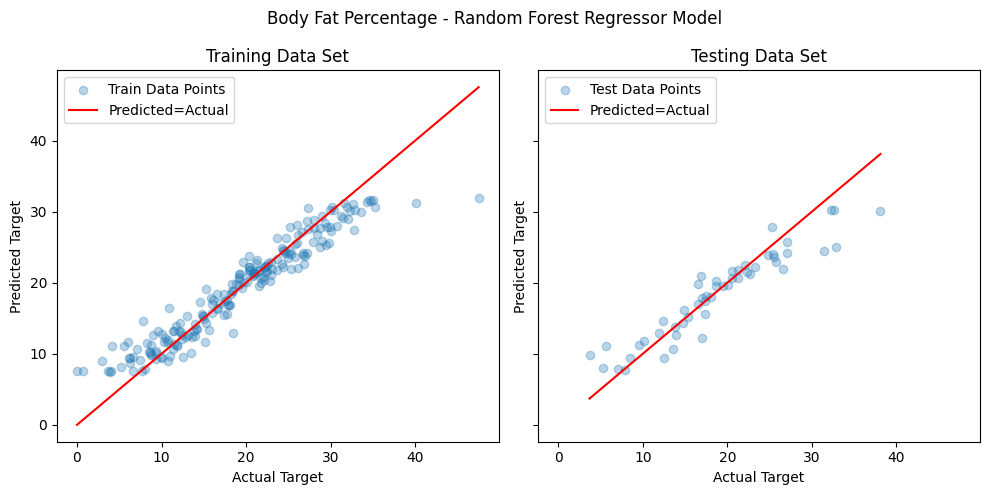

In [20]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

# Plot Training Model Performance
ax[0].scatter(y_train, y_pred_RF, alpha=0.3, label='Train Data Points')
ax[0].set_xlabel("Actual Target")
ax[0].set_ylabel("Predicted Target")
ax[0].set_title("Training Data Set")

# Ideal fit line for the Random Forest Regressor
min_RF = min(y_train.min(), y_pred_RF.min())
max_RF = max(y_train.max(), y_pred_RF.max())
ideal_line = [min_RF, max_RF]

ax[0].plot(ideal_line, ideal_line, color='red', label='Predicted=Actual')
ax[0].legend()

# Plot Testing Model Performance
ax[1].scatter(y_test, y_pred_RF_test, alpha=0.3, label='Test Data Points')
ax[1].set_xlabel("Actual Target")
ax[1].set_ylabel("Predicted Target")
ax[1].set_title("Testing Data Set")

# Ideal fit line for the Random Forest Regressor
min_RF_test = min(y_test.min(), y_pred_RF_test.min())
max_RF_test = max(y_test.max(), y_pred_RF_test.max())
ideal_line_test = [min_RF_test, max_RF_test]

ax[1].plot(ideal_line_test, ideal_line_test, color='red', label='Predicted=Actual')
ax[1].legend(loc='upper left')

fig.suptitle("Body Fat Percentage - Random Forest Regressor Model")
plt.tight_layout()

print(f"Training Data R2 Score: {randomForest.score(X_train, y_train)}")
print(f"Test Data R2 Score: {randomForest.score(X_test, y_test)}")

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

L2_error = mean_squared_error(y_train, y_pred_RF)
L1_error = mean_absolute_error(y_train, y_pred_RF)

L2_error_test = mean_squared_error(y_test, y_pred_RF_test)
L1_error_test = mean_absolute_error(y_test, y_pred_RF_test)

print("Training Losses")
print(f"L2 error (MSE): {L2_error}")
print(f"L1 error (MAE): {L1_error}")
print()
print("Testing Losses")
print(f"L2 error (MSE): {L2_error_test}")
print(f"L1 error (MAE): {L1_error_test}")

Training Losses
L2 error (MSE): 7.039419954459895
L1 error (MAE): 1.878767186976058

Testing Losses
L2 error (MSE): 8.032807533496733
L1 error (MAE): 2.0143139569251782


# Elastic Net Model

In [22]:
from sklearn.linear_model import ElasticNet

elasticNet = ElasticNet(alpha=0.0005, l1_ratio=0.65, random_state=42)
elasticNet.fit(X_train, y_train)

y_pred_EN = elasticNet.predict(X_train)
y_pred_EN_test = elasticNet.predict(X_test)

### Elastic Net Model - Modifications
##### What I learned about the parameters

I made the `alpha` very low in order to prevent the model from aggressively penalizing large coefficients. However, experimenting with the values of alpha I found that the lower it is, the higher the fit. There has to be a balancing act with this parameter in order to not overfit. Making the value too high, it leads to underfitting.

I adjusted the `l1_ratio` which fine tunes the ratio of penalizations for L1 and L2 within the overall regularization strength (`alpha`). The closer to 0, the model favors a higher penalty for L2. The closer to 1, the model favors a higher penalty for L1.

- Training Data R2 Score: 0.8838857265992707
- Test Data R2 Score: 0.8450392136699756

With the modifications, there was a better fit for both the training and test data. Also, there was a slight performance boost with the test data (roughly -0.04 R2 score versus the default's -0.05 R2 score). This means that generalization has slightly improved.

##### Model with default parameters

Leaving the model with the default parameters, the model fits the training data relatively well. But, there is a significant drop off in performance with the test data.

- Training Data R2 Score: 0.7399400143898935
- Test Data R2 Score: 0.6869570821567696

Training Data R2 Score: 0.8838857265992707
Test Data R2 Score: 0.8450392136699756


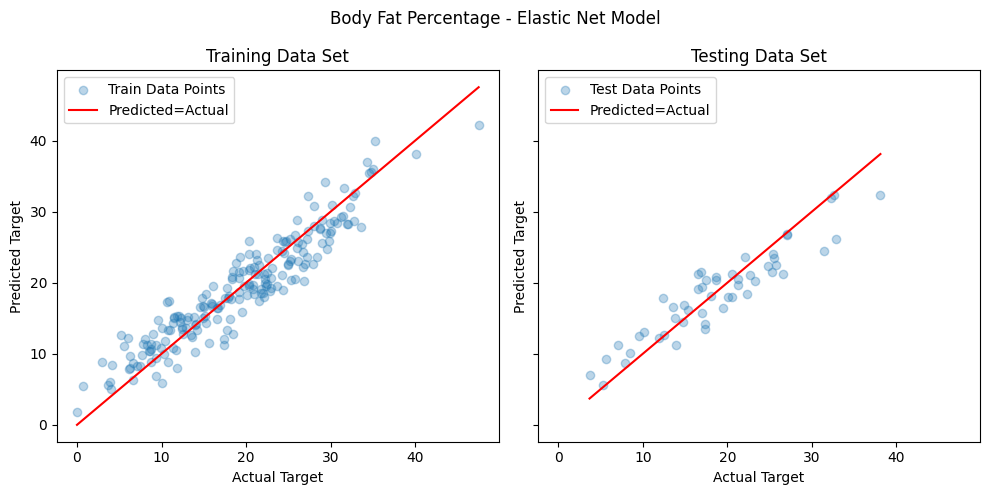

In [23]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

# Plot Training Model Performance
ax[0].scatter(y_train, y_pred_EN, alpha=0.3, label='Train Data Points')
ax[0].set_xlabel("Actual Target")
ax[0].set_ylabel("Predicted Target")
ax[0].set_title("Training Data Set")

# Ideal fit line for the Elastic Net
min_EN = min(y_train.min(), y_pred_EN.min())
max_EN = max(y_train.max(), y_pred_EN.max())
ideal_line = [min_EN, max_EN]

ax[0].plot(ideal_line, ideal_line, color='red', label='Predicted=Actual')
ax[0].legend()

# Plot Testing Model Performance
ax[1].scatter(y_test, y_pred_EN_test, alpha=0.3, label='Test Data Points')
ax[1].set_xlabel("Actual Target")
ax[1].set_ylabel("Predicted Target")
ax[1].set_title("Testing Data Set")

# Ideal fit line for the Elastic Net
min_EN_test = min(y_test.min(), y_pred_EN_test.min())
max_EN_test = max(y_test.max(), y_pred_EN_test.max())
ideal_line_test = [min_EN_test, max_EN_test]

ax[1].plot(ideal_line_test, ideal_line_test, color='red', label='Predicted=Actual')
ax[1].legend(loc='upper left')

fig.suptitle("Body Fat Percentage - Elastic Net Model")
plt.tight_layout()

print(f"Training Data R2 Score: {elasticNet.score(X_train, y_train)}")
print(f"Test Data R2 Score: {elasticNet.score(X_test, y_test)}")

In [24]:
L2_error = mean_squared_error(y_train, y_pred_EN)
L1_error = mean_absolute_error(y_train, y_pred_EN)

L2_error_test = mean_squared_error(y_test, y_pred_EN_test)
L1_error_test = mean_absolute_error(y_test, y_pred_EN_test)

print("Training Losses")
print(f"L2 error (MSE): {L2_error}")
print(f"L1 error (MAE): {L1_error}")
print()
print("Testing Losses")
print(f"L2 error (MSE): {L2_error_test}")
print(f"L1 error (MAE): {L1_error_test}")

Training Losses
L2 error (MSE): 8.43493406387868
L1 error (MAE): 2.3722839495299235

Testing Losses
L2 error (MSE): 9.02862756949669
L1 error (MAE): 2.4484683802809344


# Support Vector Regression Model

In [25]:
from sklearn.svm import SVR

SVR_model = SVR(kernel='linear', C=100)
SVR_model.fit(X_train, y_train)

y_pred_SVR = SVR_model.predict(X_train)
y_pred_SVR_test = SVR_model.predict(X_test)

### Support Vector Regression Model - Modifications
##### What I learned about the parameters

Kernel selection resulted in a significant improvement in generalization and fit for both train and test data when I changed `kernel` to 'linear'. However, the computational cost for this performance was extremely high, even for this small dataset of 252 samples. It took nearly 10 seconds to run while the other models were near instant. 

The regularization parameter `C` controls the penalty applied to errors (squared L2). A higher C value seemed to get better results in fit and test performance, leading to more generalization. The higher the C value means that the model has a lower tolerance for errors, resulting in more fitting of the train data. There needs to be a balancing act with this because you do not want to overfit your training data and then perform poorly with the test data as a result.

I attempted to alter the `gamma` parameter, which is only used for non-linear kernels including the default kernal 'rbf'. This parameter is extremely sensitive to overfitting. Even a small fractional number leads to a near perfect fit of the training data. This means that generalization is extremely poor.

- Training Data R2 Score: 0.8532100422936532
- Test Data R2 Score: 0.8096551939067245

##### Model with default parameters

This model has low fitting across the training and testing data with the default parameters. There is a relatively similar performance across the train and test data (roughly 0.03 R2 score loss in test data).

- Training Data R2 Score: 0.42688340137844294
- Test Data R2 Score: 0.39365029306803934

Training Data R2 Score: 0.8532100422936532
Test Data R2 Score: 0.8096551939067245


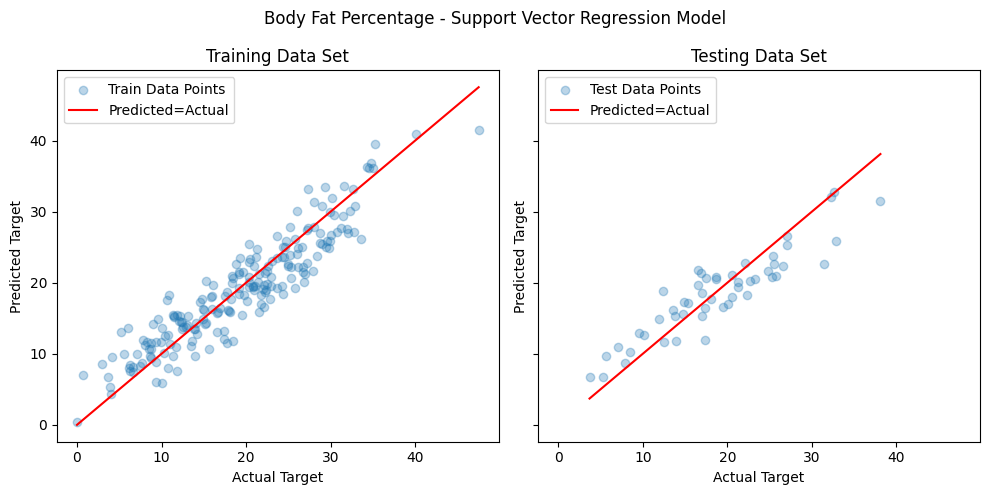

In [26]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

# Plot Training Model Performance
ax[0].scatter(y_train, y_pred_SVR, alpha=0.3, label='Train Data Points')
ax[0].set_xlabel("Actual Target")
ax[0].set_ylabel("Predicted Target")
ax[0].set_title("Training Data Set")

# Ideal fit line for the SVR
min_SVR = min(y_train.min(), y_pred_SVR.min())
max_SVR = max(y_train.max(), y_pred_SVR.max())
ideal_line = [min_SVR, max_SVR]

ax[0].plot(ideal_line, ideal_line, color='red', label='Predicted=Actual')
ax[0].legend()

# Plot Testing Model Performance
ax[1].scatter(y_test, y_pred_SVR_test, alpha=0.3, label='Test Data Points')
ax[1].set_xlabel("Actual Target")
ax[1].set_ylabel("Predicted Target")
ax[1].set_title("Testing Data Set")

# Ideal fit line for the SVR
min_SVR_test = min(y_test.min(), y_pred_SVR_test.min())
max_SVR_test = max(y_test.max(), y_pred_SVR_test.max())
ideal_line_test = [min_SVR_test, max_SVR_test]

ax[1].plot(ideal_line_test, ideal_line_test, color='red', label='Predicted=Actual')
ax[1].legend(loc='upper left')

fig.suptitle("Body Fat Percentage - Support Vector Regression Model")
plt.tight_layout()

print(f"Training Data R2 Score: {SVR_model.score(X_train, y_train)}")
print(f"Test Data R2 Score: {SVR_model.score(X_test, y_test)}")

In [27]:
L2_error = mean_squared_error(y_train, y_pred_SVR)
L1_error = mean_absolute_error(y_train, y_pred_SVR)

L2_error_test = mean_squared_error(y_test, y_pred_SVR_test)
L1_error_test = mean_absolute_error(y_test, y_pred_SVR_test)

print("Training Losses")
print(f"L2 error (MSE): {L2_error}")
print(f"L1 error (MAE): {L1_error}")
print()
print("Testing Losses")
print(f"L2 error (MSE): {L2_error_test}")
print(f"L1 error (MAE): {L1_error_test}")

Training Losses
L2 error (MSE): 10.663319661136502
L1 error (MAE): 2.676216329858813

Testing Losses
L2 error (MSE): 11.09024034212242
L1 error (MAE): 2.7587691664060485


# Three Model Comparisons

### Training Losses

##### L1 losses
- `Random Forest Regressor`: 1.878767186976058
- `Elastic Net`: 2.3722839495299235
- `Support Vector Regressor`: 2.676216329858813

##### L2 losses
- `Random Forest Regressor`: 7.039419954459895
- `Elastic Net`: 8.43493406387868
- `Support Vector Regressor`: 10.663319661136502

### Testing Losses

##### L1 losses
- `Random Forest Regressor`: 2.0143139569251782
- `Elastic Net`: 2.4484683802809344
- `Support Vector Regressor`: 2.7587691664060485

##### L2 losses
- `Random Forest Regressor`: 8.032807533496733
- `Elastic Net`: 9.02862756949669
- `Support Vector Regressor`: 11.09024034212242

### R2 Scores

##### Training R2 scores
- `Random Forest Regressor`: 0.90309620359986
- `Elastic Net`: 0.8838857265992707
- `Support Vector Regressor`: 0.8532100422936532

##### Test R2 scores
- `Random Forest Regressor`: 0.8621307433220674
- `Elastic Net`: 0.8450392136699756
- `Support Vector Regressor`: 0.8096551939067245

### Model Performance
- `Random Forest Regressor` had the lowest L1 and L2 losses out of the 3 models. This means that the model made fewer large prediction errors (L2) and the model had closer predictions to the true values in absolute terms (L1). This model had the highest Training R2 score out of the 3 models. You could argue that since it is so high it is overfitting the training data too much (0.9). Compared to the Test R2 score, it was also the highest (0.86) so it did well with generalizing the data that it had not seen prior to predicting from the training data. There was roughly a 0.04 decrease in R2 score with the test data, which is to be expected, but overall performed very similarly to the train data.

- `Elastic Net` had the second lowest L1 and L2 losses out of the 3 models. The model had the second highest R2 scores for both test and train data. The train R2 score was almost the same as the Random Forest Regressor's train R2 score (roughly a 0.02 decrease). There was a roughly 0.04 decrease in R2 score with the test data from the train data, so its generalization with test data was slightly worse than the Random Forest Regressor's generalization.

- `Support Vector Regressor` had the highest L1 and L2 losses out of the 3 models. This means that the model had more, larger errors with predictions than the other 2 models. The L2 loss was significantly higher than the other 2 models. This model had the lowest R2 scores for both train and test data. The test R2 score also had more of a drop off with generalization (roughly 0.05) compared to the other models. Overall, this model's generalization was the worst, but also the fitting was lower. It would be interesting to see the performance with a larger dataset.

---

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [28]:
from sklearn.model_selection import cross_validate, cross_val_score
body_fat_features = body_fat.drop(['target'], axis='columns')
body_fat_target = body_fat['target']
train_features, test_features, train_target, test_target = train_test_split(body_fat_features, body_fat_target, test_size=0.2, random_state=2025)

# Random Forest Regressor 5-fold cross-validation

In [29]:
randomForest = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=10, max_features=4)
randomForest_cv = cross_validate(randomForest, train_features, train_target, cv=5)

randomForest.fit(train_features, train_target)
train_pred_RF = randomForest.predict(train_features)

# L2 losses from training data
train_L2_error_RF = mean_squared_error(train_target, train_pred_RF)
train_L2_error_RF_cv = (-cross_val_score(randomForest, train_features, train_target, cv=5, scoring='neg_mean_squared_error')).mean() # changed sign to get positive L2 loss


test_pred_RF = randomForest.predict(test_features)

# Final model L2 loss
test_L2_error_RF = mean_squared_error(test_target, test_pred_RF)


print("Training Data L2 losses")
print(f"Random Forest Regressor: {train_L2_error_RF}")
print(f"Random Forest Regressor (5-fold CV Average): {train_L2_error_RF_cv}")
print()

print("Final L2 loss with the test data")
print(f"Random Forest Regressor: {test_L2_error_RF}")

Training Data L2 losses
Random Forest Regressor: 7.771682697957187
Random Forest Regressor (5-fold CV Average): 12.493755543562504

Final L2 loss with the test data
Random Forest Regressor: 7.892736360591344


The L2 losses were significantly higher for the 5 fold cross-validation of the Random Forest Regressor than just the regular Random Forest Regressor with no cross-validation. This means that the model is overfitting the training data. Interestingly, the L2 loss with the unseen test data was actually lower than the training data. This means that the test data split was easier to predict than the data held out during the CV folds. I think that because the 5-fold CV has a significantly higher L2 loss, the test data may have not been as representative of the overall data's complexity (meaning I got a bit lucky). Likely, the model is overfit and I got lucky with the test set. I think that the 5-fold CV reveals more about the model's performance.

# Elastic Net 5-fold cross-validation

In [30]:
elasticNet = ElasticNet(alpha=0.0005, l1_ratio=0.65)
elasticNet_cv = cross_validate(elasticNet, train_features, train_target, cv=5)

elasticNet.fit(train_features, train_target)
train_pred_EN = elasticNet.predict(train_features)

# L2 losses from training data
train_L2_error_EN = mean_squared_error(train_target, train_pred_EN)
train_L2_error_EN_cv = (-cross_val_score(elasticNet, train_features, train_target, cv=5, scoring='neg_mean_squared_error')).mean() # changed sign to get positive L2 loss


test_pred_EN = elasticNet.predict(test_features)

# Final model L2 loss
test_L2_error_EN = mean_squared_error(test_target, test_pred_EN)


print("Training Data L2 losses")
print(f"Elastic Net: {train_L2_error_EN}")
print(f"Elastic Net (5-fold CV Average): {train_L2_error_EN_cv}")
print()

print("Final L2 loss with the test data")
print(f"Elastic Net: {test_L2_error_EN}")

Training Data L2 losses
Elastic Net: 8.543421728537412
Elastic Net (5-fold CV Average): 10.561399789678388

Final L2 loss with the test data
Elastic Net: 7.922152974294625


The L2 losses for the 5-fold cross-validation of the Elastic Net was higher than the regular Elastic Net model with no cross-validation. The difference was not as major as in the Random Forest Regressor's case, so I would say that this model has less overfitting. Again, the final L2 loss with the test data was lower than the train data, but not by much. This potentially means there is less bias and more generalization in this model. However, it is important to keep in mind that there is still some overfitting since the 5-fold cross-validation had a higher L2 loss. 

# Support Vector Regressor 5-fold cross-validation

In [31]:
SVR_model = SVR(kernel='linear', C=100)
SVR_model_cv = cross_validate(SVR_model, train_features, train_target, cv=5)

SVR_model.fit(train_features, train_target)
train_pred_SVR = SVR_model.predict(train_features)

# L2 losses from training data
train_L2_error_SVR = mean_squared_error(train_target, train_pred_SVR)
train_L2_error_SVR_cv = (-cross_val_score(SVR_model, train_features, train_target, cv=5, scoring='neg_mean_squared_error')).mean() # changed sign to get positive L2 loss


test_pred_SVR = SVR_model.predict(test_features)

# Final model L2 loss
test_L2_error_SVR = mean_squared_error(test_target, test_pred_SVR)


print("Training Data L2 losses")
print(f"Support Vector Regressor: {train_L2_error_SVR}")
print(f"Support Vector Regressor (5-fold CV Average): {train_L2_error_SVR_cv}")
print()

print("Final L2 loss with the test data")
print(f"Support Vector Regressor: {test_L2_error_SVR}")

Training Data L2 losses
Support Vector Regressor: 11.426301620874089
Support Vector Regressor (5-fold CV Average): 17.329137735167816

Final L2 loss with the test data
Support Vector Regressor: 11.228022725225953


Out of all of the models, the SVR is experiencing the most overfitting due to the high difference in L2 losses with the 5-fold cross-validation. It was slightly higher in difference compared to the Random Forest Regressor 5-fold cross-validation. Again, I got lucky with the train and test data having very similar L2 losses with the test data actually performing slightly better. But overall, there is significant overfitting and this model does not generalize well.

---

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

## Extra: Visualized what data should look like when standardized

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Standardize the Data
scaler = StandardScaler()
body_fat_standardized = scaler.fit_transform(body_fat)
body_fat_standardized = pd.DataFrame(body_fat_standardized, columns=body_fat.columns)
body_fat_standardized

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
0,0.801644,-1.740073,-0.841246,-0.656205,-0.738664,-0.918048,-0.683533,-0.755929,-0.077479,-0.536132,-0.710826,-0.090676,-0.626718,-1.212541,-0.820246
1,1.565059,-1.819583,-0.193462,0.574790,0.209365,-0.858621,-0.887963,-0.168503,-0.134736,-0.536132,0.175947,-0.588143,0.117079,-0.031942,-1.562573
2,-0.746242,-1.819583,-0.849769,-1.066536,-1.645475,-0.597143,-0.432642,-0.098571,0.037035,0.128593,0.530656,-1.151940,-1.717621,-1.749177,0.736245
3,1.028036,-1.501543,0.198617,0.574790,-0.244040,0.115977,-0.572026,0.181156,0.132464,-0.536132,-0.178763,0.041983,0.365012,-0.031942,-1.047733
4,-1.135842,-1.660563,0.181570,0.301235,-1.480600,-0.418863,0.691719,0.279061,0.724121,1.499586,0.530656,-0.024347,-0.477958,-0.568578,1.143327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.949068,1.996904,-1.523123,-0.861370,-1.274507,-1.381576,-0.832209,-1.553150,-1.871535,-1.574763,-0.947298,-2.213203,-1.469688,0.290039,-0.975895
248,-1.683397,2.155924,0.752642,-0.109096,1.198613,0.912294,1.156332,0.642706,0.037035,0.917952,0.057711,0.970588,-0.031680,2.007274,1.730005
249,-1.199026,2.155924,0.266805,-1.134925,0.374240,1.221312,1.760328,0.251088,0.170635,-0.536132,-0.947298,-0.322828,-0.725891,-0.246597,1.215165
250,-0.825217,2.155924,0.403180,0.096070,0.374240,0.888523,0.812519,-0.294379,-0.650050,1.250313,-0.237880,-0.588143,0.365012,1.685291,0.820056


In [33]:
# Check to see that each column has mean zero and standard deviation one
body_fat_standardized.describe()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
count,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02
mean,5.568738e-16,2.220446e-16,1.409807e-16,1.480297e-15,-8.176881e-16,7.190016e-16,4.158931e-16,3.722772e-16,-4.229421e-17,-8.494087e-16,-1.409807e-17,-8.776049e-16,4.617118e-16,2.467162e-17,-1.445052e-16
std,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00
min,-3.189164e+00,-1.819583e+00,-2.060102e+00,-1.111966e+01,-2.840817e+00,-2.558223e+00,-2.151708e+00,-2.084632e+00,-2.329591e+00,-2.322577e+00,-2.366134e+00,-2.478519e+00,-3.800254e+00,-2.607794e+00,-2.292926e+00
25%,-7.462425e-01,-7.263189e-01,-6.793000e-01,-5.194276e-01,-6.562268e-01,-7.694809e-01,-7.416098e-01,-6.160653e-01,-6.500498e-01,-6.711533e-01,-6.517075e-01,-6.876365e-01,-6.763052e-01,-6.759051e-01,-7.992934e-01
50%,-3.547294e-02,-1.498703e-01,-8.265733e-02,-4.070749e-02,3.271270e-03,-1.395586e-01,-1.492290e-01,-8.458367e-02,-7.747884e-02,-3.758853e-02,-1.787626e-01,-7.409392e-02,1.790662e-02,7.538374e-02,5.891578e-03
75%,7.805874e-01,7.247413e-01,6.162669e-01,5.747897e-01,5.906378e-01,5.408772e-01,6.289963e-01,5.063391e-01,5.618920e-01,5.544317e-01,5.306560e-01,6.803984e-01,6.625308e-01,6.120195e-01,7.362450e-01
max,2.807580e+00,2.871515e+00,6.280962e+00,2.079339e+00,5.444136e+00,4.204530e+00,5.161290e+00,6.684808e+00,5.323775e+00,4.366207e+00,6.383356e+00,4.220708e+00,3.092270e+00,3.402526e+00,3.394253e+00


# Ridge Regression - Preprocessed and Using a Pipeline

In [34]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(body_fat_features, body_fat_target, test_size=0.2, random_state=42)

pipeline = make_pipeline(StandardScaler(), Ridge())
pipeline.fit(X_train, y_train)
ridge_pred_train = pipeline.predict(X_train)
ridge_pred_test = pipeline.predict(X_test)

l2_train_ridge = mean_squared_error(y_train, ridge_pred_train)
l2_test_ridge = mean_squared_error(y_test, ridge_pred_test)

L2 Loss (Train Data): 1.8566362073058142
L2 Loss (Test Data): 0.4304901630337328


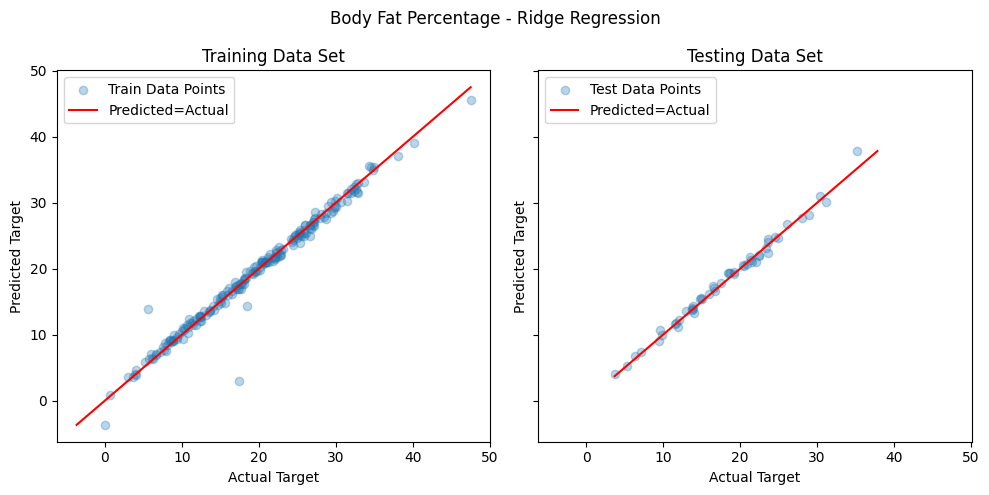

In [35]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

# Plot Training Model Performance
ax[0].scatter(y_train, ridge_pred_train, alpha=0.3, label='Train Data Points')
ax[0].set_xlabel("Actual Target")
ax[0].set_ylabel("Predicted Target")
ax[0].set_title("Training Data Set")

# Ideal fit line for the Ridge Regression (training)
min_ridge = min(y_train.min(), ridge_pred_train.min())
max_ridge = max(y_train.max(), ridge_pred_train.max())
ideal_line = [min_ridge, max_ridge]

ax[0].plot(ideal_line, ideal_line, color='red', label='Predicted=Actual')
ax[0].legend()

# Plot Testing Model Performance
ax[1].scatter(y_test, ridge_pred_test, alpha=0.3, label='Test Data Points')
ax[1].set_xlabel("Actual Target")
ax[1].set_ylabel("Predicted Target")
ax[1].set_title("Testing Data Set")

# Ideal fit line for the Ridge Regression (testing)
min_ridge_test = min(y_test.min(), ridge_pred_test.min())
max_ridge_test = max(y_test.max(), ridge_pred_test.max())
ideal_line_test = [min_ridge_test, max_ridge_test]

ax[1].plot(ideal_line_test, ideal_line_test, color='red', label='Predicted=Actual')
ax[1].legend(loc='upper left')

fig.suptitle("Body Fat Percentage - Ridge Regression")
plt.tight_layout()

print(f"L2 Loss (Train Data): {l2_train_ridge}")
print(f"L2 Loss (Test Data): {l2_test_ridge}")

# Linear Regression (Ordinary Least Squares) - Preprocessed and Using a Pipeline

In [36]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(body_fat_features, body_fat_target, test_size=0.2, random_state=42)

pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline.fit(X_train, y_train)
LR_pred_train = pipeline.predict(X_train)
LR_pred_test = pipeline.predict(X_test)

l2_train_LR = mean_squared_error(y_train, LR_pred_train)
l2_test_LR = mean_squared_error(y_test, LR_pred_test)

L2 Loss (Train Data): 1.8509654380266318
L2 Loss (Test Data): 0.3803098373278478


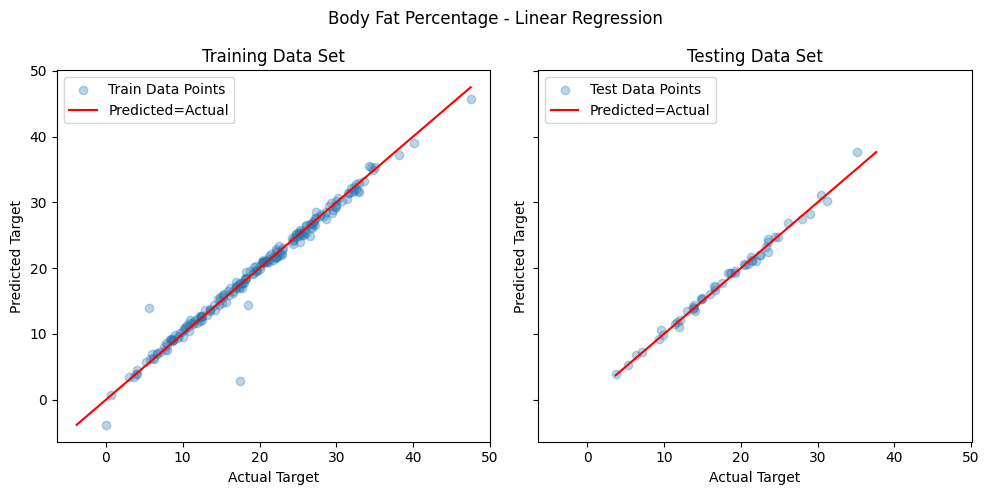

In [37]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

# Plot Training Model Performance
ax[0].scatter(y_train, LR_pred_train, alpha=0.3, label='Train Data Points')
ax[0].set_xlabel("Actual Target")
ax[0].set_ylabel("Predicted Target")
ax[0].set_title("Training Data Set")

# Ideal fit line for the Linear Regression (training)
min_LR = min(y_train.min(), LR_pred_train.min())
max_LR = max(y_train.max(), LR_pred_train.max())
ideal_line = [min_LR, max_LR]

ax[0].plot(ideal_line, ideal_line, color='red', label='Predicted=Actual')
ax[0].legend()

# Plot Testing Model Performance
ax[1].scatter(y_test, LR_pred_test, alpha=0.3, label='Test Data Points')
ax[1].set_xlabel("Actual Target")
ax[1].set_ylabel("Predicted Target")
ax[1].set_title("Testing Data Set")

# Ideal fit line for the Linear Regression (testing)
min_LR_test = min(y_test.min(), LR_pred_test.min())
max_LR_test = max(y_test.max(), LR_pred_test.max())
ideal_line_test = [min_LR_test, max_LR_test]

ax[1].plot(ideal_line_test, ideal_line_test, color='red', label='Predicted=Actual')
ax[1].legend(loc='upper left')

fig.suptitle("Body Fat Percentage - Linear Regression")
plt.tight_layout()

print(f"L2 Loss (Train Data): {l2_train_LR}")
print(f"L2 Loss (Test Data): {l2_test_LR}")

# Lasso - Preprocessed and Using a Pipeline

In [38]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(body_fat_features, body_fat_target, test_size=0.2, random_state=42)

pipeline = make_pipeline(StandardScaler(), Lasso())
pipeline.fit(X_train, y_train)
lasso_pred_train = pipeline.predict(X_train)
lasso_pred_test = pipeline.predict(X_test)

l2_train_lasso = mean_squared_error(y_train, lasso_pred_train)
l2_test_lasso = mean_squared_error(y_test, lasso_pred_test)

L2 Loss (Train Data): 3.0306754380274823
L2 Loss (Test Data): 0.9556816651427997


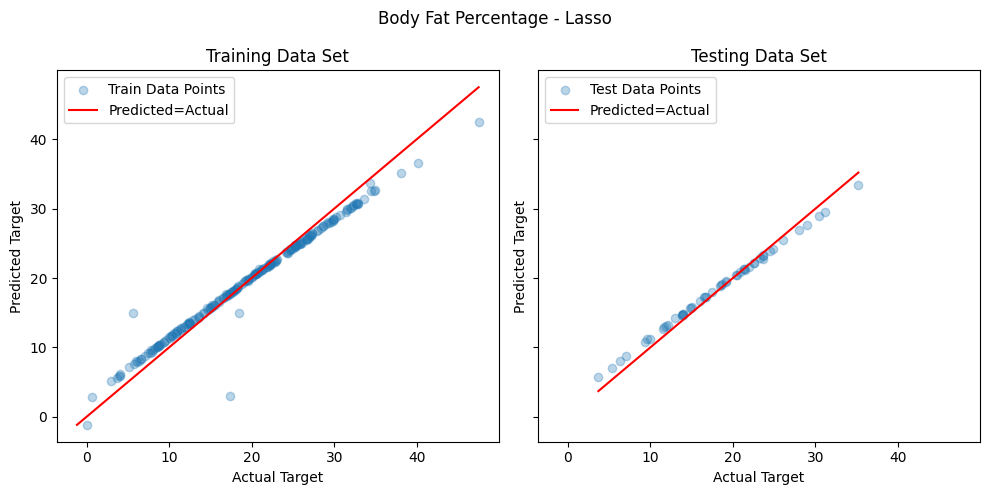

In [39]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

# Plot Training Model Performance
ax[0].scatter(y_train, lasso_pred_train, alpha=0.3, label='Train Data Points')
ax[0].set_xlabel("Actual Target")
ax[0].set_ylabel("Predicted Target")
ax[0].set_title("Training Data Set")

# Ideal fit line for the Lasso (training)
min_lasso = min(y_train.min(), lasso_pred_train.min())
max_lasso = max(y_train.max(), lasso_pred_train.max())
ideal_line = [min_lasso, max_lasso]

ax[0].plot(ideal_line, ideal_line, color='red', label='Predicted=Actual')
ax[0].legend()

# Plot Testing Model Performance
ax[1].scatter(y_test, lasso_pred_test, alpha=0.3, label='Test Data Points')
ax[1].set_xlabel("Actual Target")
ax[1].set_ylabel("Predicted Target")
ax[1].set_title("Testing Data Set")

# Ideal fit line for the Lasso (testing)
min_lasso_test = min(y_test.min(), lasso_pred_test.min())
max_lasso_test = max(y_test.max(), lasso_pred_test.max())
ideal_line_test = [min_lasso_test, max_lasso_test]

ax[1].plot(ideal_line_test, ideal_line_test, color='red', label='Predicted=Actual')
ax[1].legend(loc='upper left')

fig.suptitle("Body Fat Percentage - Lasso")
plt.tight_layout()

print(f"L2 Loss (Train Data): {l2_train_lasso}")
print(f"L2 Loss (Test Data): {l2_test_lasso}")

## Comparisons of L2 losses of each model

### `3 new models`
#### Ridge Regression:
- L2 Loss (Train Data): 1.8566362073058142
- L2 Loss (Test Data): 0.4304901630337328

#### Linear Regression:
- L2 Loss (Train Data): 1.8509654380266318
- L2 Loss (Test Data): 0.3803098373278478

#### Lasso:
- L2 Loss (Train Data): 3.0306754380274823
- L2 Loss (Test Data): 0.9556816651427997

### `Problem 6 models`
#### Random Forest Regressor
- L2 Loss (Train Data): 7.039419954459895
- L2 Loss (Test Data): 8.032807533496733

#### Elastic Net
- L2 Loss (Train Data): 8.43493406387868
- L2 Loss (Test Data): 9.02862756949669

#### Support Vector Regressor
- L2 Loss (Train Data): 10.663319661136502
- L2 Loss (Test Data): 11.09024034212242

### `Comparisons`
- Ridge Regression: Performed better on the test data. This model has the second lowest L2 loss on the test data.

- Linear Regression: Performed better on the test data. Out of all of the models, Linear Regression has the lowest L2 loss on the test data.

- Lasso: Performed better on the test data. This model has the third lowest L2 loss on the test data.

- Random Forest Regressor: Performed worse on the test data. This model has a significantly higher L2 loss than the first 3 models (Ridge, Linear Regression, Lasso). Overall, it had the fourth highest L2 loss for both the train and test data.

- Elastic Net: Performed worse on the test data. This model has a significantly higher L2 loss than the first 3 models (Ridge, Linear Regression, Lasso). Overall, it had the fifth highest L2 loss for both the train and test data.

- Support Vector Regressor: Performed worse on the test data. This model has a significantly higher L2 loss than the first 3 models (Ridge, Linear Regression, Lasso). Overall, it had the highest L2 loss for both the train and test data.

---

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [40]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [41]:
# YOUR CODE HERE

YOUR ANSWERS HERE